<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
<h1>DECISION TREE: EWS</h1>    </font>
</div>

In this notebook, health data from patients of the emergency departments of three hospitals in the US, France, and Switzerland is used.This data contains the parameters (RR, HR, BPs etc.) that are used to arrive at the EWS score, but also contains info about the duration of the stay in the hospital (LOS), diastolic blood pressure (BPD), and inflammation markers such as procalcitonin (PCT) and Mid-Regional Pro-Adrenomedullin (MR-proADM).

In [1]:
import numpy as npimport pandas as pdimport matplotlib.pyplot as pltfrom sklearn import tree

In [2]:
ews = pd.read_csv("data/NEWS_datafile_withEWS.csv")

In [3]:
ews

,hospital,country,resp_rate,confusion,gender,death30d,SpO2,BPS,BPD,HR,temp,MR-proADM,PCT,discharge location,LOS,age,ICU,EWS
0,Clearwater Hospital,USA,22,0,m,0,93,158,88.0,82,36.4,1.677191,0.117062,Home,2.0,68,0,4
1,Clearwater Hospital,USA,20,0,m,0,98,164,102.0,72,37.0,0.636032,0.077208,Home,2.0,61,0,0
2,Clearwater Hospital,USA,18,1,f,1,100,166,88.0,91,36.7,1.021181,0.119181,Institution,10.0,78,0,2
3,Clearwater Hospital,USA,17,0,m,0,98,148,71.0,59,35.6,2.236069,0.128453,Home,2.0,58,0,1
4,Clearwater Hospital,USA,16,0,m,0,100,194,79.0,63,35.7,0.859614,0.072874,Home,4.0,78,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Aarau,Switzerland,24,0,f,0,96,145,72.0,70,37.1,0.804300,0.069014,Home,1.0,63,0,2
1299,Aarau,Switzerland,34,0,m,0,76,193,123.0,137,36.0,0.639700,0.036537,Home,7.0,62,0,10
1300,Aarau,Switzerland,32,0,f,0,72,126,59.0,82,37.7,3.968000,0.103435,Home,15.0,81,0,6
1301,Aarau,Switzerland,18,0,m,0,98,162,123.0,82,36.6,0.531000,0.070668,Home,0.0,62,0,0


## predicting vital parameters icu

In [4]:
# vital parametersdata = ews[["resp_rate", "confusion", "SpO2", "BPS", "HR", "temp"]]     # all numeric

In [5]:
data = np.array(data)

In [6]:
print(data)

[[ 22.    0.   93.  158.   82.   36.4]
 [ 20.    0.   98.  164.   72.   37. ]
 [ 18.    1.  100.  166.   91.   36.7]
 ...
 [ 32.    0.   72.  126.   82.   37.7]
 [ 18.    0.   98.  162.   82.   36.6]
 [ 40.    0.   97.  144.   76.   37.3]]


In [7]:
icu = ews["ICU"]
icu = np.array(icu)print(icu)

[0 0 0 ... 0 0 0]


In [8]:
beslissingsboom1 = tree.DecisionTreeClassifier(criterion="gini")   # tree is created through gini indexbeslissingsboom1.fit(data, icu)    # generate tree that corresponds to data

DecisionTreeClassifier()

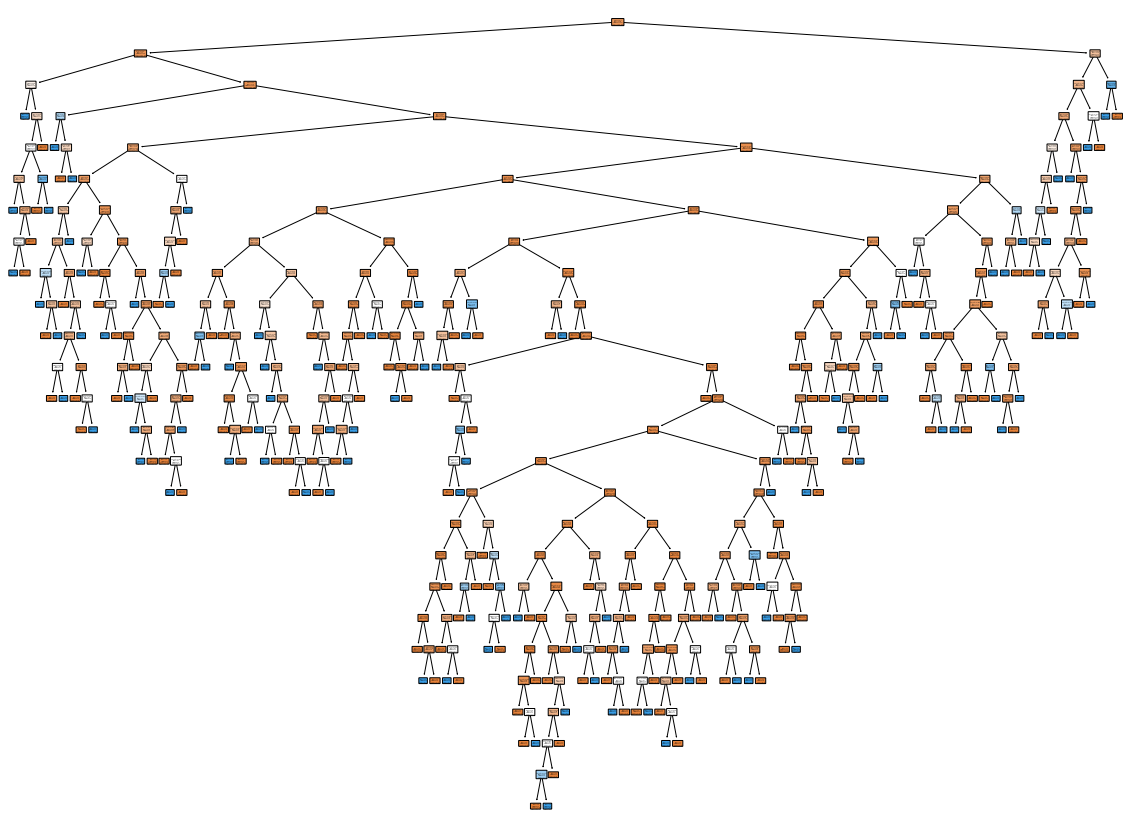

In [9]:
plt.figure(figsize=(20,15))tree.plot_tree(decisiontree1,class_names=["no ICU", "ICU"],feature_names=["resp_rate", "confusion", "SpO2", "BPS", "HR", "temp"],               filled=True, rounded=True)plt.show()

Can you determine from the tree which parameters most indicate who ends up in the ICU?

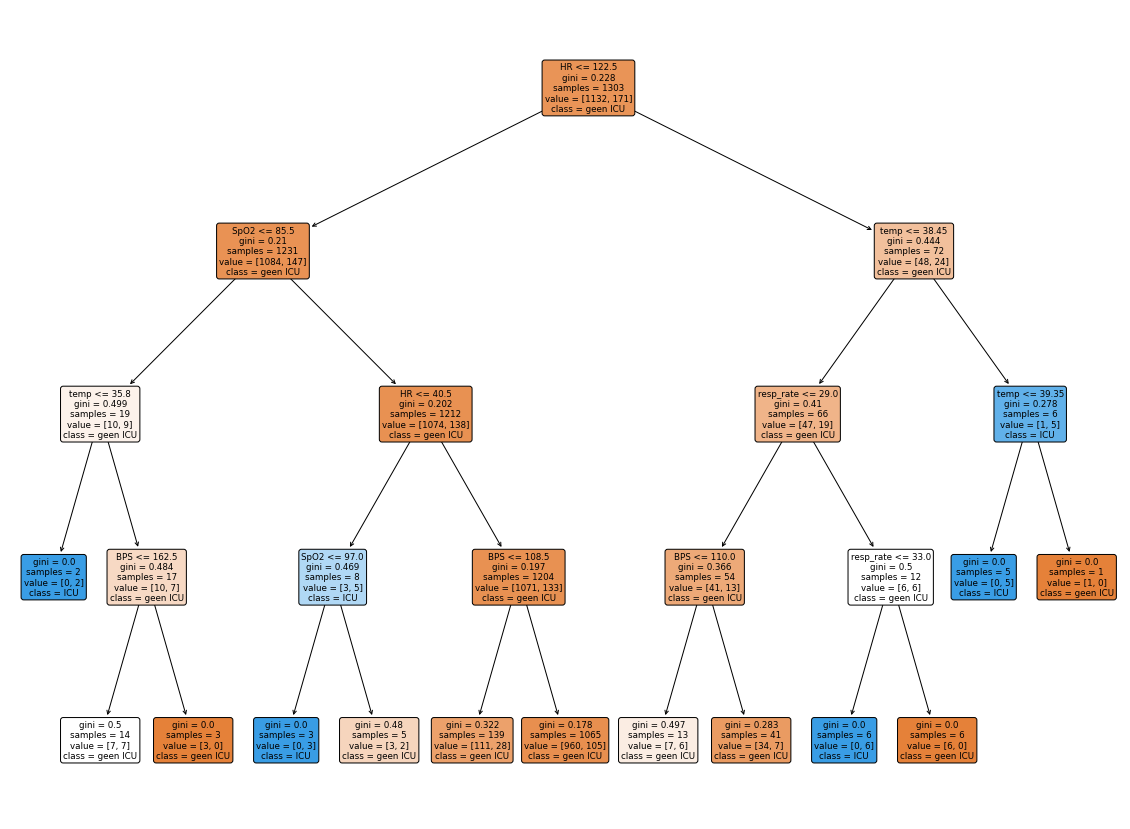

In [10]:
beslissingsboom2 = tree.DecisionTreeClassifier(criterion="gini", max_depth=4)   # tree is created using gini-indexbeslissingsboom2.fit(data, icu)    # generate tree that corresponds to data
plt.figure(figsize=(20,15))tree.plot_tree(decisiontree2,class_names=["no ICU", "ICU"],               feature_names=["resp_rate", "confusion", "SpO2", "BPS", "HR", "temp"],               filled=True, rounded=True)plt.show()

## ews predicts icu

EWS score related to ICU? Normally, a high EWS should correspond to ICU yes

In [11]:
parameter_ews = ews[["EWS"]]parameter_ews = np.array(parameter_ews)

In [12]:
# icu = EWS["ICU"]# icu = np.array(icu)

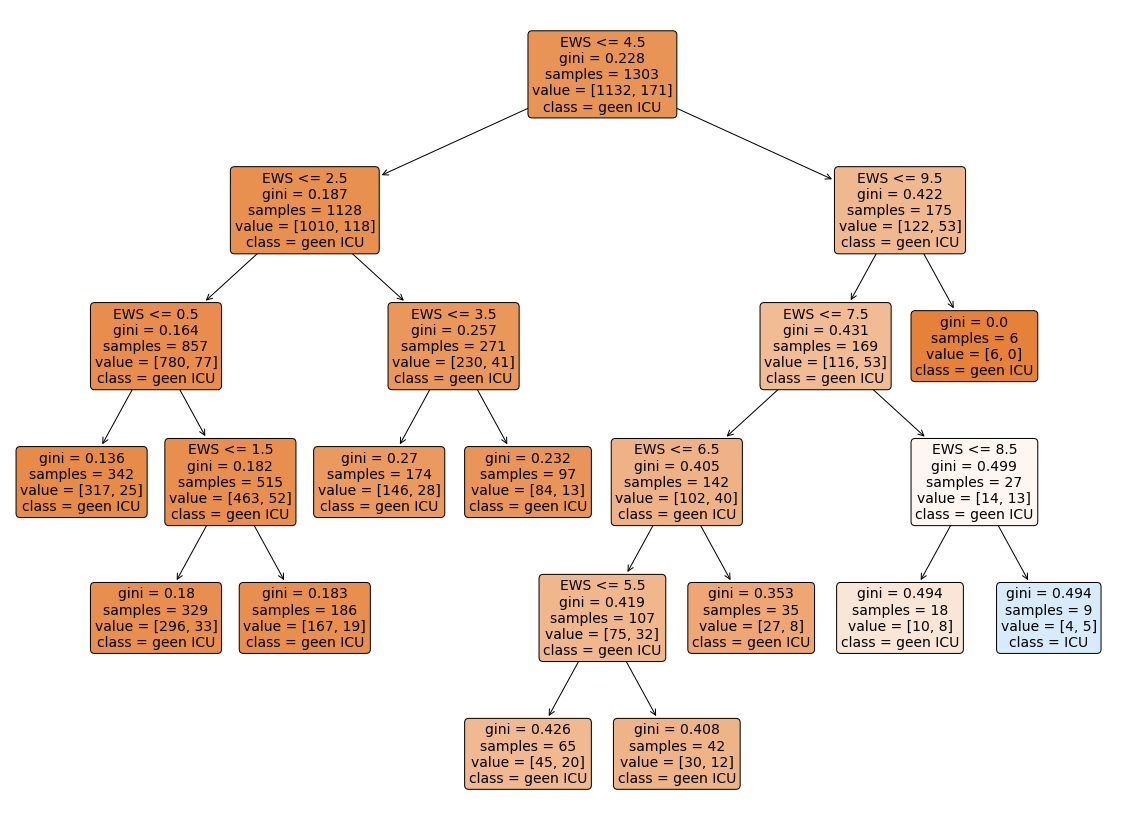

In [13]:
beslissingsboom3 = tree.DecisionTreeClassifier(criterion="gini")   # tree is created using gini-indexbeslissingsboom3.fit(parameter_ews, icu)    # generate tree that corresponds to data
plt.figure(figsize=(20,15))tree.plot_tree(decisiontree3,class_names=["no ICU", "ICU"],feature_names=["EWS"],               filled=True, rounded=True)plt.show()

## predict vital parameters ews

In [14]:
class = ews["EWS"]class = np.array(class)

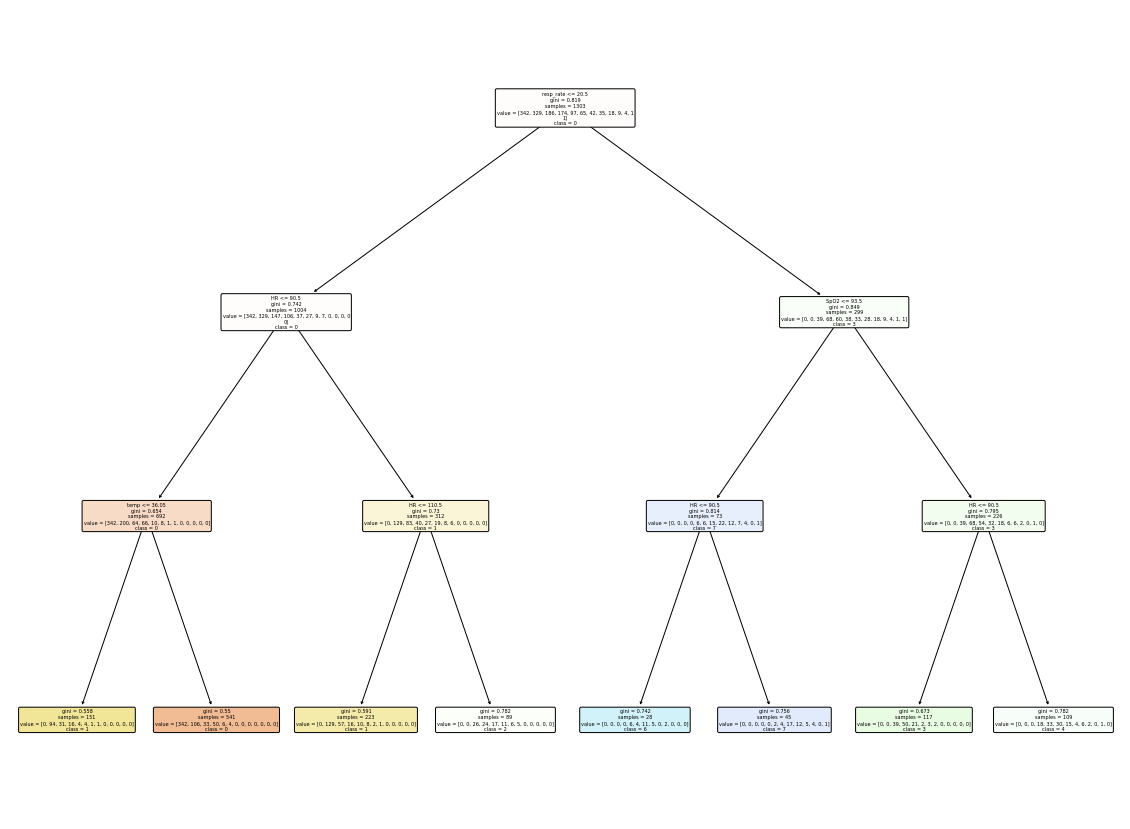

In [15]:
beslissingsboom4 = tree.DecisionTreeClassifier(criterion="gini", max_depth=3)   # tree is created via gini-indexbeslissingsboom4.fit(data, klas)    # generate tree that corresponds to data
plt.figure(figsize=(20,15))tree.plot_tree(decisiontree4,class_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"],               feature_names=["resp_rate", "confusion", "SpO2", "BPS", "HR", "temp"],               filled=True, rounded=True)# plt.savefig("dt_vital_ews.svg")# plt.savefig("dt_vital_ews.pdf")plt.show()

## Heart rate predicts ICU?

In [16]:
heartbeat = ews[["HR"]]heart_rate = np.array(heart_rate)print(heartbeat)

[[82]
 [72]
 [91]
 ...
 [82]
 [82]
 [76]]


In [17]:
beslissingsboom5 = tree.DecisionTreeClassifier(criterion="gini", max_depth=4)   # tree is created via gini-indexbeslissingsboom5.fit(heartrate, icu)    # generate tree that corresponds to data

DecisionTreeClassifier(max_depth=4)

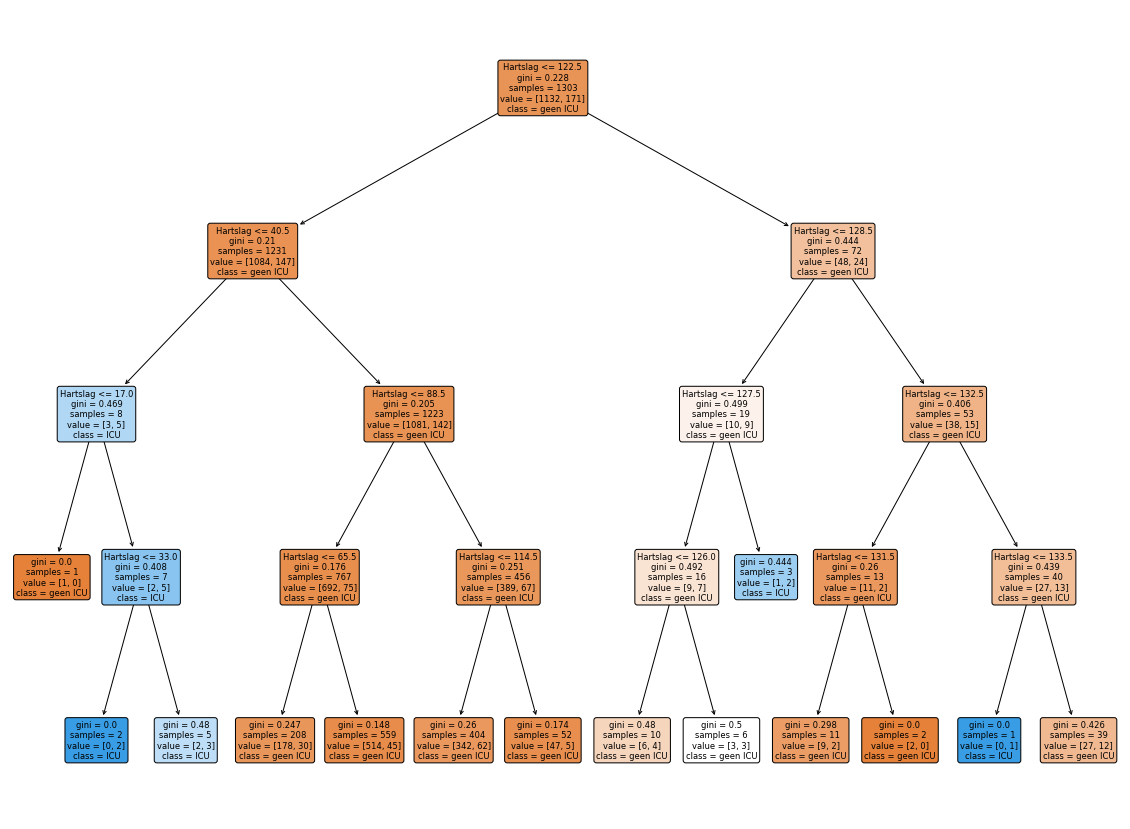

In [18]:
plt.figure(figsize=(20,15))tree.plot_tree(decisiontree5,class_names=["no ICU", "ICU"],               feature_names=["Heart Rate"], 
               filled=True, rounded=True)# plt.savefig("dthr4.png", dpi=500)plt.show()

## HR and temp prediction ICU

In [19]:
parameters = ews[["HR", "temp"]]parameters = np.array(parameters)

In [20]:
beslissingsboom6 = tree.DecisionTreeClassifier(criterion="gini",max_depth=4)   # tree is created using gini-indexbeslissingsboom6.fit(parameters, icu)    # generate tree that corresponds with data

DecisionTreeClassifier(max_depth=4)

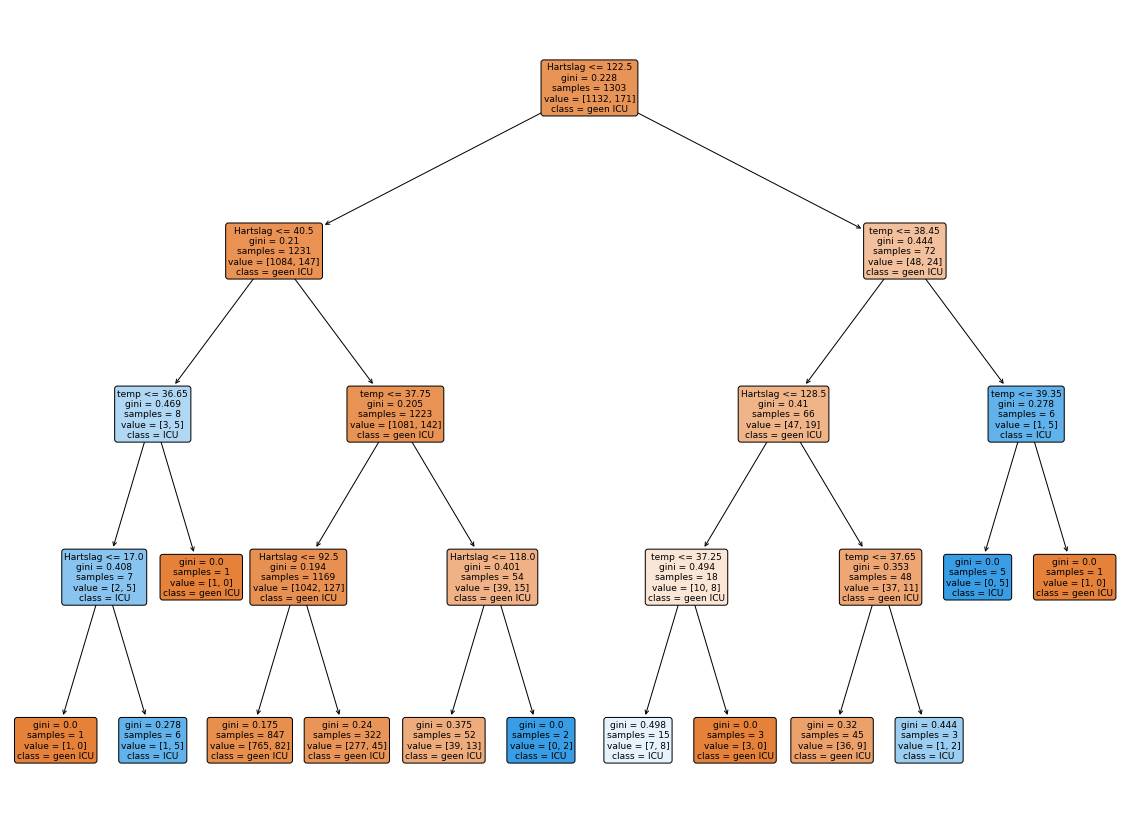

In [21]:
plt.figure(figsize=(20,15))tree.plot_tree(decisiontree6,class_names=["no ICU", "ICU"],               feature_names=["Heart rate", "temp"],               filled=True, rounded=True)plt.show()

## Predict HR and temp EWS

In [22]:
# class = ews["EWS"]# klas = np.array(klas)

In [23]:
# print(class)

[4 0 2 ... 6 0 3]


In [24]:
np.max(class)

14

In [25]:
beslissingsboom7 = tree.DecisionTreeClassifier(criterion="gini",max_depth=4)   # tree is created using gini indexbeslissingsboom7.fit(parameters, klas)    # generate tree corresponding to data

DecisionTreeClassifier(max_depth=4)

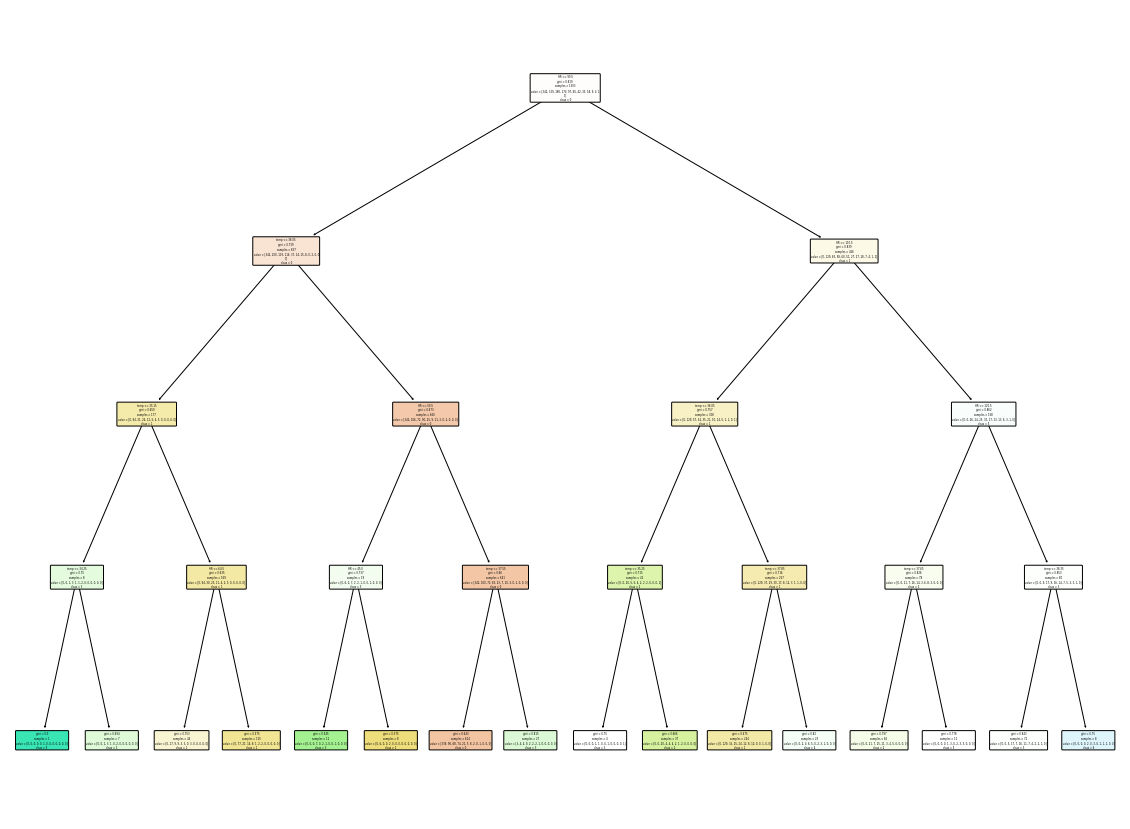

In [26]:
plt.figure(figsize=(20,15))tree.plot_tree(decisiontree7,class_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"],feature_names=["HR", "temp"],               filled=True, rounded=True)# plt.savefig("dt_hrtemp_ews.png", dpi=500)plt.show()